In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


INPUT_FILE = 'top-400000'


In [154]:
df = pd.read_csv(INPUT_FILE, sep='\t')
df.columns=["offset","mer","count"] 

df.shape

df

,offset,mer,count
0,0,ACACGTCA,1
1,0,ATAAGACC,2
2,0,CGTCTCAG,7
3,0,CCAAAGGG,6
4,0,GTTCGCCA,2
...,...,...,...
18051495,320,TGNNNNNN,27947
18051496,320,ATNNNNNN,28642
18051497,320,TTNNNNNN,31629
18051498,320,ANNNNNNN,3


In [155]:

position_counts = df['offset'].value_counts().to_frame()
position_counts.rename(columns={'offset': 'count'}, inplace=True)
position_counts['position'] = position_counts.index

position_counts

,count,position
67,60869,67
251,60857,251
241,60836,241
255,60823,255
55,60812,55
...,...,...
316,4134,316
317,1062,317
318,294,318
319,83,319


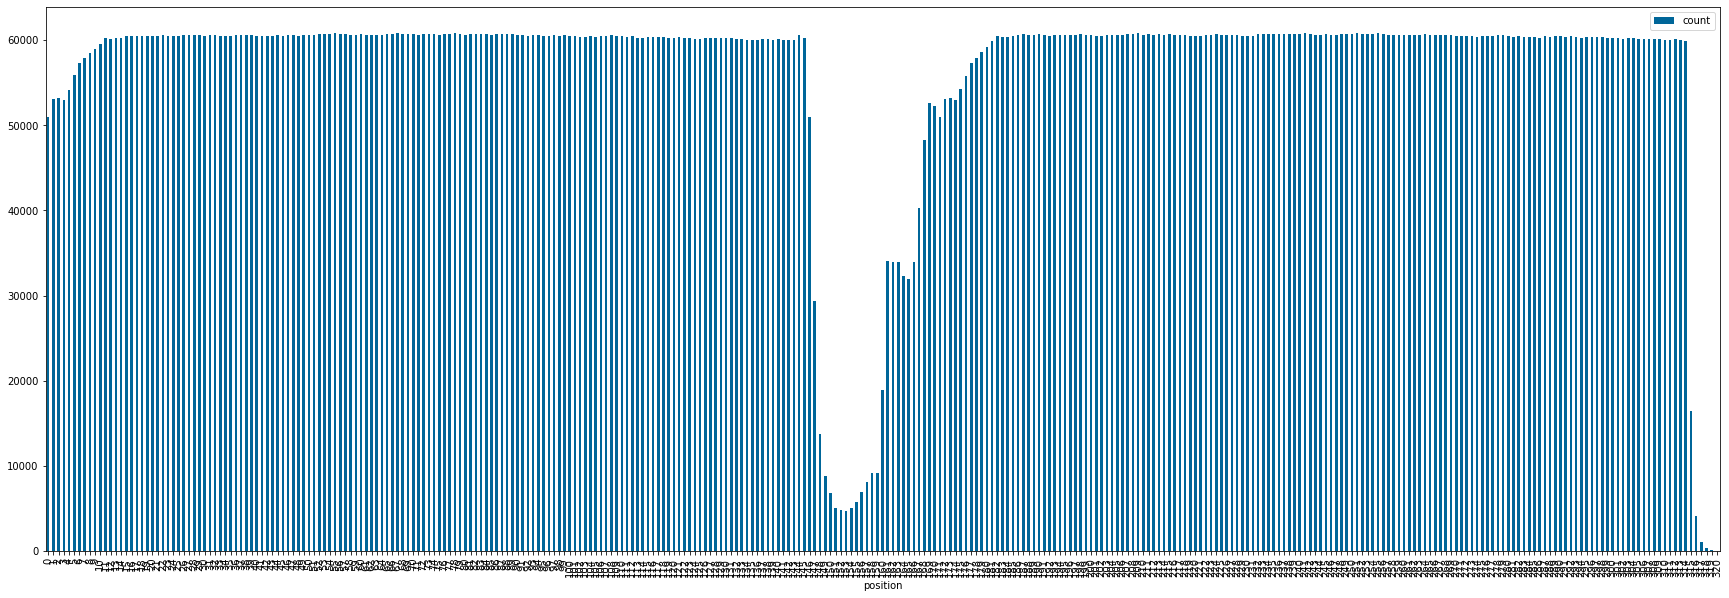

In [156]:
fig = position_counts.sort_values('position').plot(x='position', y='count', kind='bar', figsize=(30,10), color='#006699')

In [157]:
fig.get_figure().savefig(INPUT_FILE+'-position_counts.png')

<AxesSubplot:xlabel='position'>

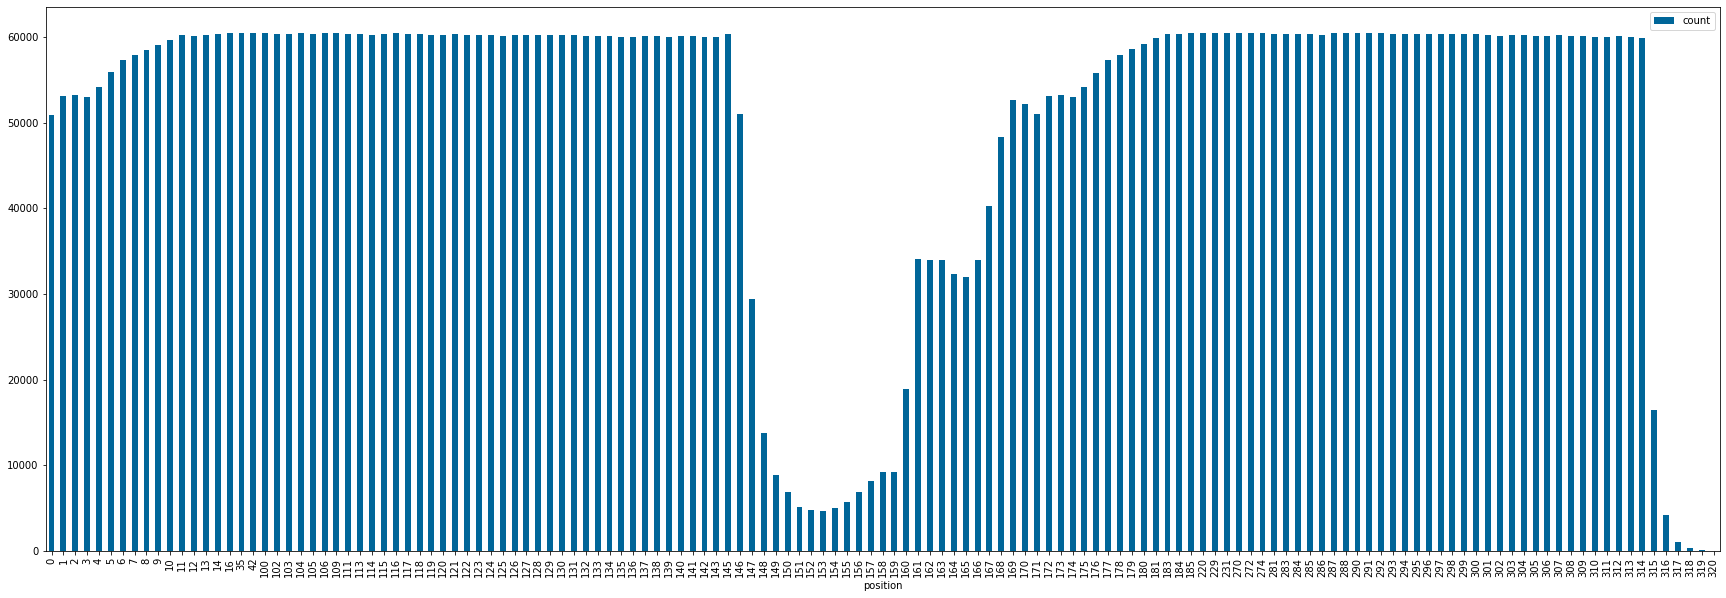

In [158]:
potentialpositions = position_counts.loc[position_counts['count'] < 60500].sort_values('count', ascending=True)
potentialpositions.sort_values('position').plot(x='position', y='count', kind='bar', figsize=(30,10), color='#006699')

In [159]:
potentialpositions = potentialpositions['position'].to_list()

In [160]:
biodynamiindexes = ["TCCGTTCC", "GGCAAACG", "TCCTACGG", "GTATCATC", "GAGGCTAC", "GTAAGCGA", "GTCCTTCT"]

for i in potentialpositions:
    onefivethree = df.loc[df['offset'] == i]
    total = onefivethree.loc[onefivethree['mer'].isin(biodynamiindexes)]
    print(str(i)+":" +str(total.shape[0]))

320:0
319:0
318:0
317:0
316:0
153:1
152:0
154:0
151:1
155:1
150:0
156:0
157:1
149:1
159:1
158:1
148:3
315:0
160:2
147:3
165:6
164:5
166:4
163:2
162:2
161:7
167:5
168:5
0:6
171:6
146:5
170:6
169:6
174:6
3:5
1:7
172:6
2:5
173:4
4:5
175:6
176:4
5:4
6:7
177:7
7:7
178:5
8:7
179:6
9:7
180:6
10:5
181:6
314:7
310:6
143:6
313:6
311:6
142:5
139:6
135:6
136:5
134:5
141:6
309:6
306:6
137:5
312:6
305:7
140:5
133:6
125:5
138:7
308:5
12:7
302:7
132:7
307:7
124:7
114:6
303:6
129:6
122:5
131:6
11:6
301:6
130:7
120:6
123:7
304:7
126:5
128:7
286:6
127:6
13:5
119:6
145:6
113:5
299:6
14:7
300:6
294:7
296:7
298:6
117:4
283:6
121:5
183:6
184:6
284:7
115:6
102:6
118:7
293:6
111:6
285:4
295:5
297:6
103:6
105:5
281:7
274:7
291:7
288:7
116:6
292:6
100:7
220:7
272:6
270:7
106:7
16:6
35:6
104:7
290:7
229:6
42:7
185:7
231:6
287:7
109:6


In [168]:
i7biodynamiindexes = ["CCGAGTGA", "GTTTCGGG", "TTCAGTAC", "GTTTGTCC", "TACACTCA", "CGGTGTAC", "TTCATCCG"]

res = []
for i in potentialpositions:
    onefivethree = df.loc[df['offset'] == i]
    total = onefivethree.loc[onefivethree['mer'].isin(i7biodynamiindexes)]
    res.append((i, total.shape[0]))

dfr = pd.DataFrame.from_records(res, columns =['position', 'count'])

dfr.sort_values('count', ascending=False)


,position,count
70,133,7
118,103,7
106,121,7
103,298,7
98,299,7
...,...,...
12,157,0
15,158,0
16,148,0
17,315,0
